In [1]:
from collections import OrderedDict
from pandas import DataFrame
import pandas as pd
import numpy as np



## 데이터프레임 만들기

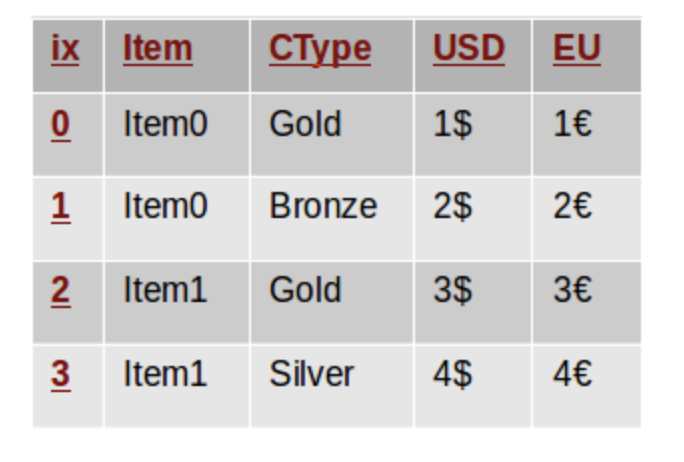

In [5]:
from IPython.display import Image
Image(filename='pivot_dataframe.png') 

In [2]:
table = OrderedDict((
    ("Item", ['Item0', 'Item0', 'Item1', 'Item1']),
    ('CType',['Gold', 'Bronze', 'Gold', 'Silver']),
    ('USD',  ['1$', '2$', '3$', '4$']),
    ('EU',   ['1€', '2€', '3€', '4€'])
))

In [3]:
d = DataFrame(table)

In [4]:
d

,Item,CType,USD,EU
0,Item0,Gold,1$,1€
1,Item0,Bronze,2$,2€
2,Item1,Gold,3$,3€
3,Item1,Silver,4$,4€


## 칼럼과 인덱스 그리고 값을 지정해서 새로운 데이터 프레임으로 변형

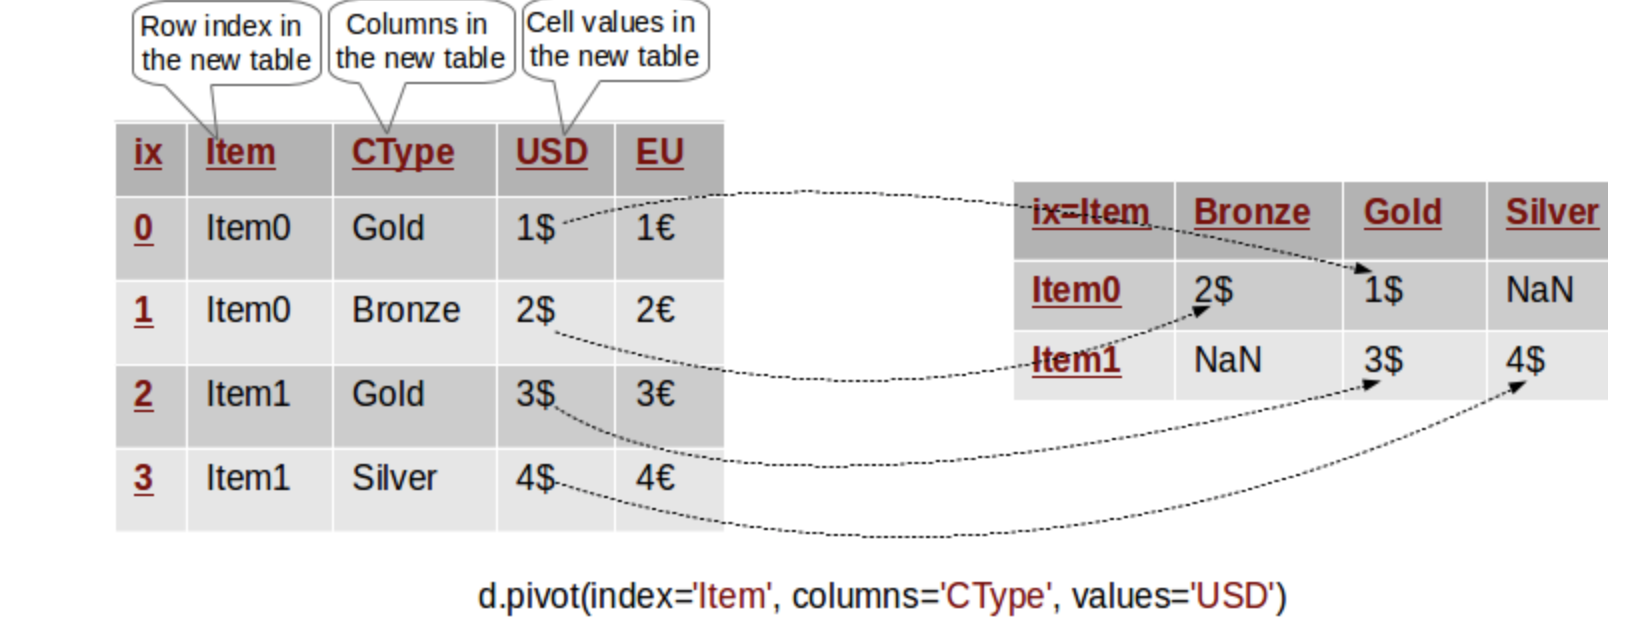

In [11]:
from IPython.display import Image
Image(filename='pivot_process.png') 

In [6]:
p = d.pivot(index='Item', columns='CType', values='USD')

In [9]:
p

CType,Bronze,Gold,Silver
Item,,,
Item0,2$,1$,None
Item1,None,3$,4$


In [21]:
d.index

RangeIndex(start=0, stop=4, step=1)

In [16]:
d.CType

0      Gold
1    Bronze
2      Gold
3    Silver
Name: CType, dtype: object

In [17]:
d.USD

0    1$
1    2$
2    3$
3    4$
Name: USD, dtype: object

In [18]:
d.Item

0    Item0
1    Item0
2    Item1
3    Item1
Name: Item, dtype: object

In [12]:
# Original DataFrame: Access the USD cost of Item0 for Gold customers
print (d[(d.Item=='Item0') & (d.CType=='Gold')].USD.values)


['1$']


In [30]:
d[['Item','USD']].loc[1][1]

'2$'

### 피봇으로 재배치된 열의 정보를 확인하기

In [14]:
p.Gold

Item
Item0    1$
Item1    3$
Name: Gold, dtype: object

In [15]:
p.Gold.values

array(['1$', '3$'], dtype=object)

In [13]:
# Pivoted DataFrame: Access the USD cost of Item0 for Gold customers
print (p[p.index=='Item0'].Gold.values)

['1$']


## pivot으로 칼럼을 멀티인덱스 처리하기 

In [32]:
p1 = d.pivot(index='Item', columns='CType')

In [33]:
p1

USD                 EU            
CType Bronze Gold Silver Bronze Gold Silver
Item                                       
Item0     2$   1$   None     2€   1€   None
Item1   None   3$     4$   None   3€     4€

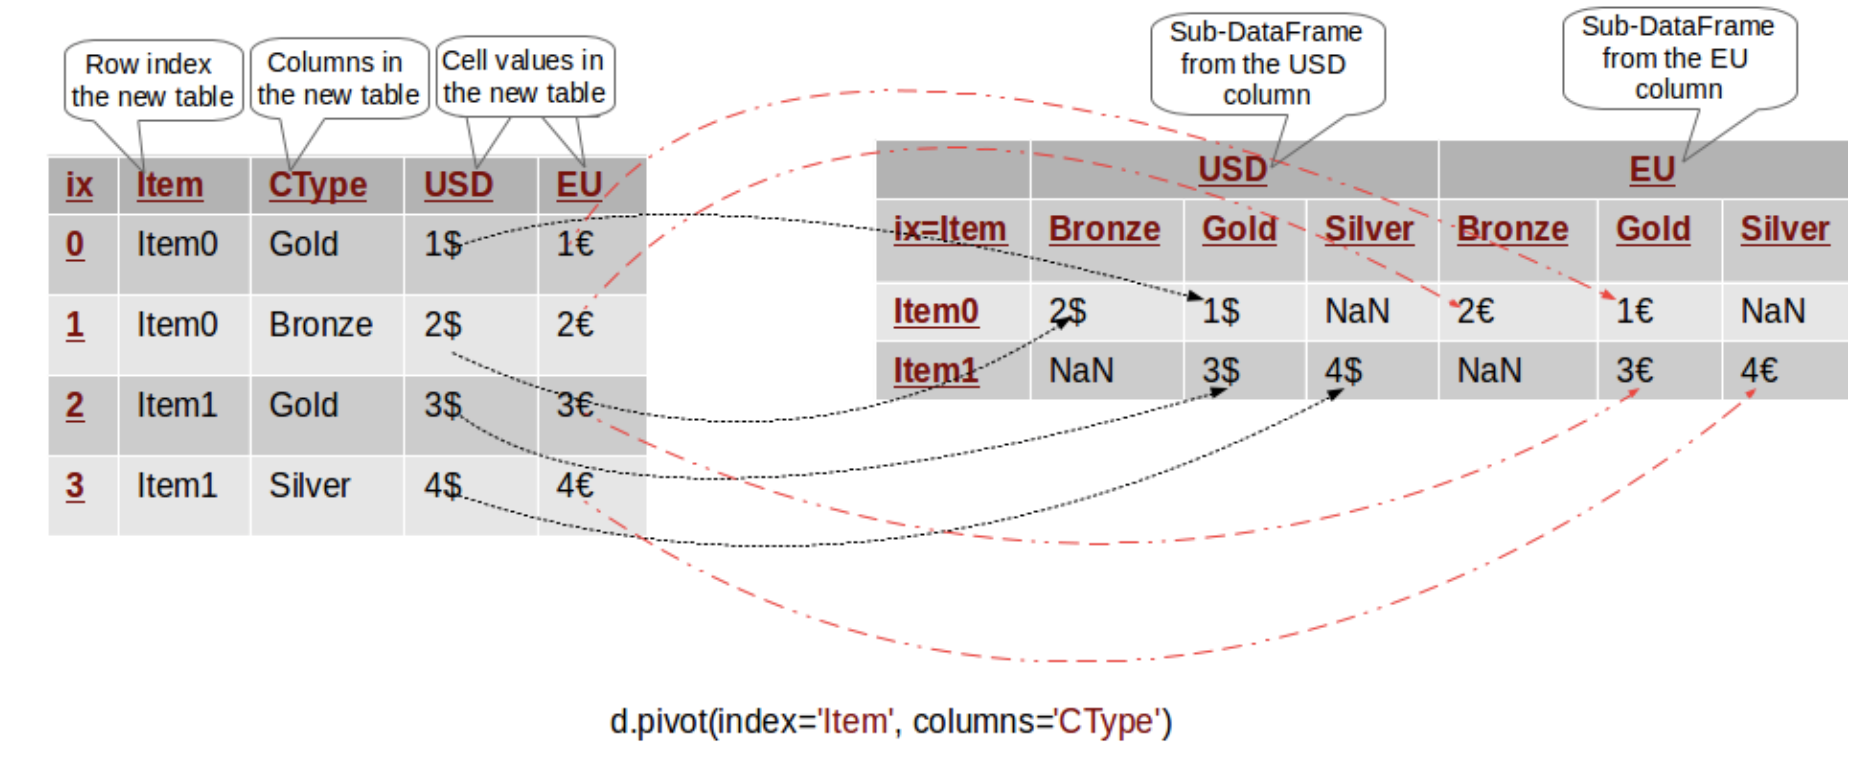

In [34]:
from IPython.display import Image
Image(filename='pivot_multiindex.png') 